---
# EDA

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

In [2]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

In [3]:
df_부실징후 = pd.read_csv("./datasets/부실징후_전처리끝.csv", index_col=0)
df_부실징후["거래소코드"] = df_부실징후["거래소코드"].map(padding)
print(df_부실징후.shape[0])
df_부실징후.head(5)

1535


회사명   거래소코드    회계년도  회생여부  이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)  \
0  케이알모터스(주)  000040  2012.0     0         -6.47  -19829.71     726.84   
1  케이알모터스(주)  000040  2013.0     0         -4.29    9379.15     603.89   
2      (주)경방  000050  2012.0     1          0.36   80728.78   19777.92   
3   (주)삼양홀딩스  000070  2013.0     1          0.14  196611.70   -1733.79   
4      (주)두산  000150  2015.0     1          0.38  564990.15   59502.36   

   매출액총이익률  매출액순이익률  총자본사업이익률  ...     LEV지수          KZ지수          WW지수  \
0     5.87    -8.41     -4.72  ...  0.000000 -1.081775e+11  3.482079e+09   
1     7.59    -6.64     -2.77  ...  0.000000 -8.591876e+10 -6.576044e+08   
2    21.82    -2.37      0.56  ...  0.330302 -2.635866e+10  3.467151e+09   
3    13.02    -1.13      0.83  ...  0.071968 -2.303052e+11  1.241049e+09   
4    15.78    -8.97      1.01  ...  0.100110 -1.958926e+11  1.745611e+09   

           CL지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0  3.448467e+11  0.053516       0    -9765.0      -0.000016   -268520.0   
1  2.809350e+11  0.001550       1      154.0       0.000010    666080.0   
2  2.466891e+11 -3.169267       1    13629.0       0.000848       861.0   
3  1.337212e+11  0.099707       4   102250.0       0.002022    -91060.0   
4  2.024146e+11 -0.844810       0  -426231.0      -0.001261   -625687.0   

   순매수거래대금 비중_외국인  
0       -0.000200  
1        0.001283  
2        0.000042  
3       -0.001833  
4       -0.004927  

[5 rows x 88 columns]

In [4]:
target = "회생여부"
y = df_부실징후[target]
x = df_부실징후.drop(["회사명","거래소코드","회계년도",target], axis=1)

---
# Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

x.feature = x.columns

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(x)
data_scaled_stan = scaler_stan.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=x.feature)
x_scaled_stan

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_33397/3528705467.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률   매출액순이익률  총자본사업이익률  \
0         0.124569  -0.611784  -0.352804 -0.566623  0.162108 -0.193568   
1         0.203461  -0.342080  -0.363650 -0.461949  0.215308  0.115898   
2         0.371739   0.316735   1.327668  0.404053  0.343650  0.644371   
3         0.363777   1.386755  -0.569853 -0.131493  0.380920  0.687220   
4         0.372462   4.788224   4.831711  0.036474  0.145276  0.715786   
...            ...        ...        ...       ...       ...       ...   
1530      0.301171  -0.365882  -0.258313 -0.235559  0.249272 -0.193568   
1531      0.128912  -0.370246  -0.360548  0.897607 -6.486435 -1.282254   
1532      0.365586  -0.439898  -0.370366  1.699709 -1.780758  0.693568   
1533     -0.151189  -0.433019  -0.410589  3.320343  0.078851 -0.488751   
1534      0.346045  -0.082827  -0.283942  2.507287  0.430815  0.665002   

       총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...     LEV지수      KZ지수  \
0     0.010397  0.184389  0.127696  0.358705  ... -0.770197  0.267967   
1     0.080809  0.207892  0.190847  0.369507  ... -0.770197  0.428034   
2     0.464249  0.506480  0.454436  0.009805  ...  3.439371  0.856341   
3     0.434400  0.462122  0.488071 -0.009990  ...  0.147003 -0.610276   
4     0.095351  0.074487  0.160644 -1.164435  ...  0.505667 -0.362809   
...        ...       ...       ...       ...  ...       ...       ...   
1530  0.029531  0.240995 -0.051462  0.236428  ... -0.765807 -1.061740   
1531 -4.612309 -6.236251 -5.119363 -0.956729  ...  0.412055 -0.300687   
1532 -0.869754 -0.674963 -0.779763 -0.637658  ... -0.174164 -1.061714   
1533 -0.011032  0.301573  0.064544 -0.078969  ... -0.770197  0.785248   
1534  0.545376  0.571362  0.613687  0.490961  ... -0.770197  0.568222   

          WW지수      CL지수    NCAV지수    기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  \
0     0.294464 -0.266268  0.386685 -1.123073   0.053752       0.118546   
1    -0.327447 -0.355011  0.345990 -0.349669   0.059843       0.125033   
2     0.292221 -0.402562 -2.137103 -0.349669   0.068119       0.328696   
3    -0.042209 -0.559421  0.422858  1.970542   0.122543       0.613790   
4     0.033592 -0.464038 -0.316801 -1.123073  -0.202012      -0.183854   
...        ...       ...       ...       ...        ...            ...   
1530 -0.066039 -0.157267  0.507089 -1.123073  -3.353989      -1.323372   
1531  1.037264  3.934759 -0.093315 -1.123073   0.050278       0.077577   
1532 -0.160034  3.026444  0.666883 -0.349669   0.055270       0.056982   
1533  0.714443 -0.054634  0.488397 -1.123073   0.007559      -0.130813   
1534 -2.185021 -0.587953  0.568847  0.423735   0.192553       0.656196   

      순매수거래량_외국인  순매수거래대금 비중_외국인  
0      -0.189106        0.033277  
1       0.458138        0.534397  
2      -0.002550        0.115014  
3      -0.066208       -0.518416  
4      -0.436457       -1.563716  
...          ...             ...  
1530   -0.351799       -0.198210  
1531    0.194805        0.424240  
1532    0.004346        0.154706  
1533    0.109530        0.351251  
1534   -0.363818        0.160706  

[1535 rows x 84 columns]

In [6]:
from sklearn.preprocessing import RobustScaler

x.feature = x.columns

# StandardScaler객체 생성
scaler_robust = RobustScaler()
scaler_robust.fit(x)
data_scaled_robust = scaler_robust.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_robust = pd.DataFrame(data = data_scaled_robust, columns=x.feature)
x_scaled_robust

이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률    매출액순이익률  총자본사업이익률  \
0        -0.720372  -1.108046  -0.146535 -0.322164  -0.284574 -0.570441   
1        -0.382649  -0.124097  -0.184641 -0.216416  -0.156080 -0.233362   
2         0.337723   2.279435   5.757975  0.658469   0.153902  0.342264   
3         0.303641   6.183145  -0.909159  0.117430   0.243920  0.388937   
4         0.340821  18.592589  18.069790  0.287120  -0.325227  0.420052   
...            ...        ...        ...       ...        ...       ...   
1530      0.035631  -0.210932   0.185469  0.012296  -0.074047 -0.570441   
1531     -0.701782  -0.226852  -0.173744  1.157086 -16.342650 -1.756266   
1532      0.311387  -0.480962  -0.208239  1.967415  -4.977132  0.395851   
1533     -1.900852  -0.455864  -0.349567  3.604673  -0.485662 -0.891962   
1534      0.227730   0.821728   0.095418  2.783277   0.364428  0.364736   

       총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...     LEV지수      KZ지수  \
0    -0.346241 -0.173657 -0.231499  0.266294  ... -0.350156 -0.030929   
1    -0.241458 -0.138828 -0.144213  0.284077  ... -0.350156  0.102386   
2     0.329157  0.303655  0.220114 -0.308088  ...  3.295772  0.459110   
3     0.284738  0.237920  0.266603 -0.340675  ...  0.444235 -0.762392   
4    -0.219818 -0.336522 -0.185958 -2.241199  ...  0.754875 -0.556283   
...        ...       ...       ...       ...  ...       ...       ...   
1530 -0.317768 -0.089772 -0.479127  0.064994  ... -0.346355 -1.138403   
1531 -7.225513 -9.688496 -7.483871 -1.899260  ...  0.673798 -0.504544   
1532 -1.656036 -1.447143 -1.485769 -1.373984  ...  0.166070 -1.138381   
1533 -0.378132  0.000000 -0.318786 -0.454234  ... -0.350156  0.399899   
1534  0.449886  0.399804  0.440228  0.484022  ... -0.350156  0.219144   

          WW지수      CL지수    NCAV지수    기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  \
0     0.326211  0.150306  0.166822 -0.333333  -0.084346      -0.016488   
1    -0.268011  0.023704  0.104852  0.000000   0.001532       0.013681   
2     0.324068 -0.044133 -3.676377  0.000000   0.118199       0.960958   
3     0.004527 -0.267910  0.221905  1.000000   0.885477       2.286981   
4     0.076953 -0.131836 -0.904440 -0.333333  -3.690097      -1.423009   
...        ...       ...       ...       ...        ...            ...   
1530 -0.018242  0.305808  0.350171 -0.333333 -48.126571      -6.723115   
1531  1.035940  6.143555 -0.564117 -0.333333  -0.133315      -0.207047   
1532 -0.108052  4.847739  0.593504  0.000000  -0.062935      -0.302835   
1533  0.727491  0.452226  0.321708 -0.333333  -0.735573      -1.176306   
1534 -2.042881 -0.308615  0.444216  0.333333   1.872468       2.484217   

      순매수거래량_외국인  순매수거래대금 비중_외국인  
0      -1.489969       -0.090846  
1       3.695958        0.800981  
2       0.004778        0.054619  
3      -0.505276       -1.072677  
4      -3.471824       -2.932966  
...          ...             ...  
1530   -2.793520       -0.502816  
1531    1.586047        0.604939  
1532    0.060033        0.125258  
1533    0.902793        0.475043  
1534   -2.889820        0.135935  

[1535 rows x 84 columns]

In [7]:
from sklearn.preprocessing import MinMaxScaler

x.feature = x.columns

# StandardScaler객체 생성
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(x)
data_scaled_minmax = scaler_minmax.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled_minmax = pd.DataFrame(data = data_scaled_minmax, columns=x.feature)
x_scaled_minmax

이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률   매출액순이익률  총자본사업이익률  \
0         0.953828   0.000000   0.040183  0.403676  0.761246  0.833214   
1         0.967321   0.049945   0.038175  0.419247  0.766125  0.861131   
2         0.996101   0.171948   0.351291  0.548072  0.777894  0.908805   
3         0.994739   0.370099   0.000000  0.468405  0.781312  0.912670   
4         0.996225   1.000000   1.000000  0.493391  0.759702  0.915247   
...            ...        ...        ...       ...       ...       ...   
1530      0.984032   0.045537   0.057676  0.452924  0.769239  0.833214   
1531      0.954571   0.044729   0.038749  0.621492  0.151544  0.735004   
1532      0.995049   0.031831   0.036931  0.740811  0.583076  0.913243   
1533      0.906666   0.033105   0.029485  0.981894  0.753611  0.806586   
1534      0.991706   0.097955   0.052931  0.860945  0.785888  0.910666   

       총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...     LEV지수      KZ지수  \
0     0.444787  0.729851  0.736971  0.417973  ...  0.000000  0.794327   
1     0.447715  0.732459  0.743821  0.418917  ...  0.000000  0.832559   
2     0.463658  0.765594  0.772409  0.387481  ...  0.436469  0.934859   
3     0.462417  0.760672  0.776057  0.385751  ...  0.095100  0.584560   
4     0.448320  0.717655  0.740545  0.284858  ...  0.132288  0.643667   
...        ...       ...       ...       ...  ...       ...       ...   
1530  0.445583  0.736133  0.717540  0.407287  ...  0.000455  0.476728   
1531  0.252578  0.017339  0.167883  0.303010  ...  0.122582  0.658505   
1532  0.408191  0.634487  0.638550  0.330896  ...  0.061800  0.476734   
1533  0.443896  0.742855  0.730122  0.379723  ...  0.000000  0.917879   
1534  0.467032  0.772794  0.789681  0.429532  ...  0.000000  0.866043   

          WW지수      CL지수    NCAV지수  기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  \
0     0.502097  0.143438  0.852595    0.00   0.354668       0.574877   
1     0.376160  0.125344  0.849338    0.25   0.354838       0.575287   
2     0.501643  0.115649  0.650609    0.25   0.355069       0.588176   
3     0.433920  0.083666  0.855490    1.00   0.356589       0.606217   
4     0.449270  0.103114  0.796293    0.00   0.347525       0.555740   
...        ...       ...       ...     ...        ...            ...   
1530  0.429095  0.165663  0.862231    0.00   0.259500       0.483629   
1531  0.652514  1.000000  0.814179    0.00   0.354571       0.572284   
1532  0.410061  0.814801  0.875020    0.25   0.354710       0.570981   
1533  0.587143  0.186589  0.860735    0.00   0.353378       0.559097   
1534  0.000000  0.077849  0.867174    0.50   0.358544       0.608901   

      순매수거래량_외국인  순매수거래대금 비중_외국인  
0       0.446283        0.730644  
1       0.464870        0.757417  
2       0.451640        0.735011  
3       0.449812        0.701169  
4       0.439179        0.645323  
...          ...             ...  
1530    0.441610        0.718277  
1531    0.457308        0.751532  
1532    0.451838        0.737132  
1533    0.454859        0.747633  
1534    0.441265        0.737452  

[1535 rows x 84 columns]

---
## EDA

### 1. Data type

In [41]:
df_부실징후.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 0 to 1534
Data columns (total 88 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   회사명                  1535 non-null   object 
 1   거래소코드                1535 non-null   object 
 2   회계년도                 1535 non-null   float64
 3   회생여부                 1535 non-null   int64  
 4   이자보상배율(이자비용)         1535 non-null   float64
 5   부가가치(백만원)            1535 non-null   float64
 6   금융비용(백만원)            1535 non-null   float64
 7   매출액총이익률              1535 non-null   float64
 8   매출액순이익률              1535 non-null   float64
 9   총자본사업이익률             1535 non-null   float64
 10  총자본순이익률              1535 non-null   float64
 11  자기자본순이익률             1535 non-null   float64
 12  경영자본순이익률             1535 non-null   float64
 13  자본금순이익률              1535 non-null   float64
 14  매출원가대매출액비율           1535 non-null   float64
 15  영업비용대영업수익비율          1535 non-null   f

#### 2. 기술통계량

In [48]:
x_scaled_robust.describe().T

count      mean        std         min       25%  50%  \
이자보상배율(이자비용)    1535.0 -1.253635   4.282247  -24.594888 -0.696359  0.0   
부가가치(백만원)       1535.0  1.123902   3.649449   -1.108046 -0.313385  0.0   
금융비용(백만원)       1535.0  1.093079   3.514747   -0.909159 -0.294541  0.0   
매출액총이익률         1535.0  0.250271   1.010587   -3.063634 -0.359361  0.0   
매출액순이익률         1535.0 -0.676108   2.416065  -20.333938 -0.729583  0.0   
...                ...       ...        ...         ...       ...  ...   
기업생명주기          1535.0  0.150706   0.431136   -0.333333 -0.333333  0.0   
순매수거래량_기관       1535.0 -0.842135  14.102565 -179.125969 -0.879091  0.0   
순매수거래대금 비중_기관   1535.0 -0.567870   4.652699  -42.269376 -0.879763  0.0   
순매수거래량_외국인      1535.0  0.025207   8.014930 -126.001420 -0.438160  0.0   
순매수거래대금 비중_외국인  1535.0 -0.150068   1.780249  -24.429071 -0.594031  0.0   

                     75%         max  
이자보상배율(이자비용)    0.303641    0.435321  
부가가치(백만원)       0.686615   18.592589  
금융비용(백만원)       0.705459   18.069790  
매출액총이익률         0.640639    3.727636  
매출액순이익률         0.270417    6.003630  
...                  ...         ...  
기업생명주기          0.666667    1.000000  
순매수거래량_기관       0.120909  325.688746  
순매수거래대금 비중_기관   0.120237   31.229644  
순매수거래량_외국인      0.561840  152.995397  
순매수거래대금 비중_외국인  0.405969    8.881558  

[84 rows x 8 columns]

#### 3. Boxplot

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_28580/3278788020.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


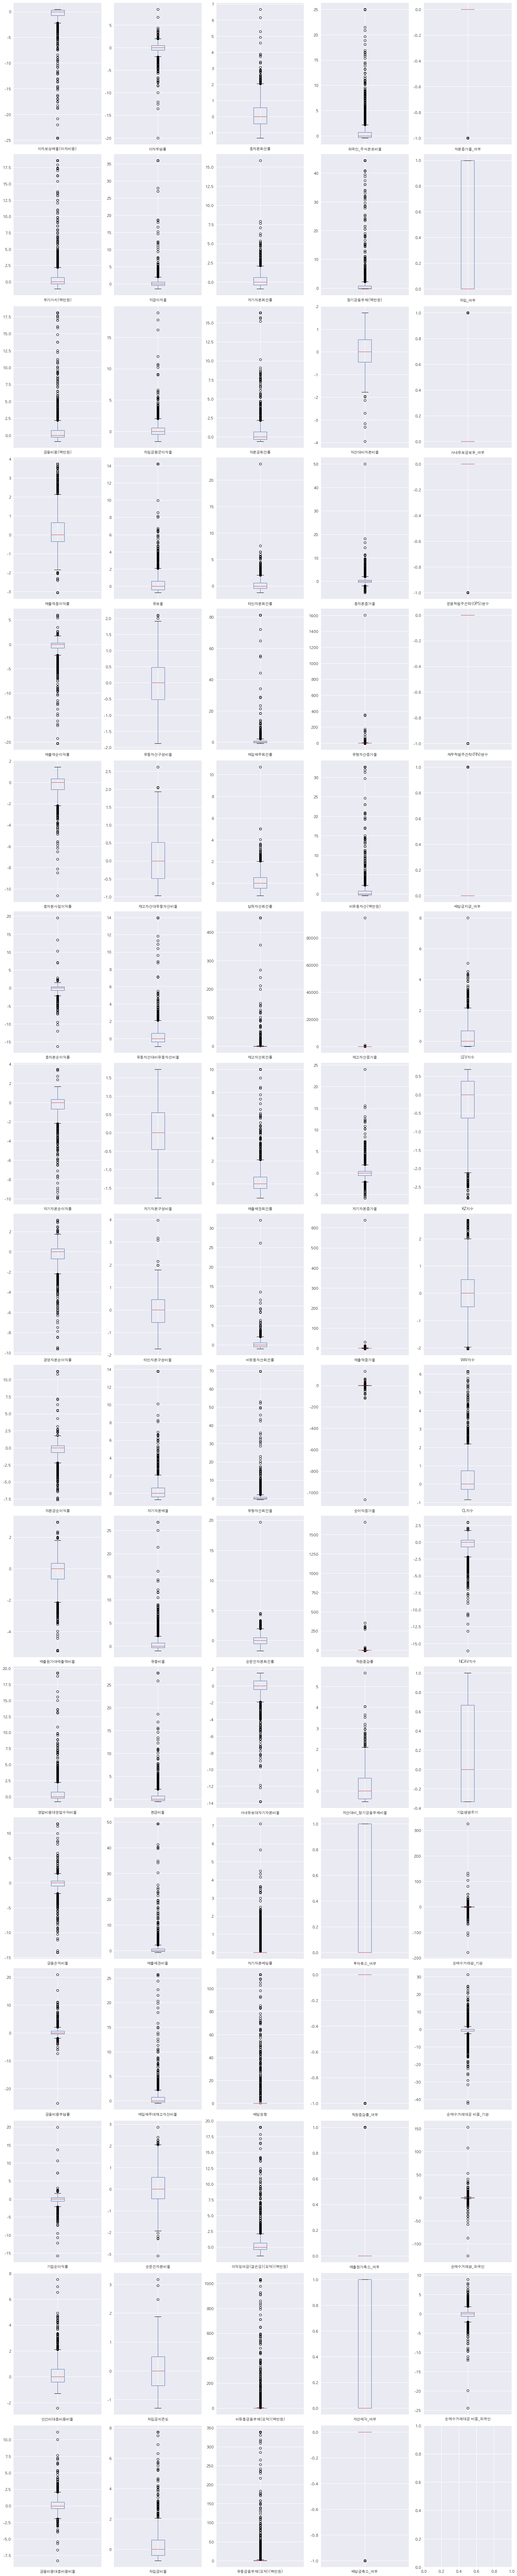

In [49]:
df_부실징후_outlier = x_scaled_robust
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

ncols = 5
nrows = 17

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 100))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()

#### 4. Distplot

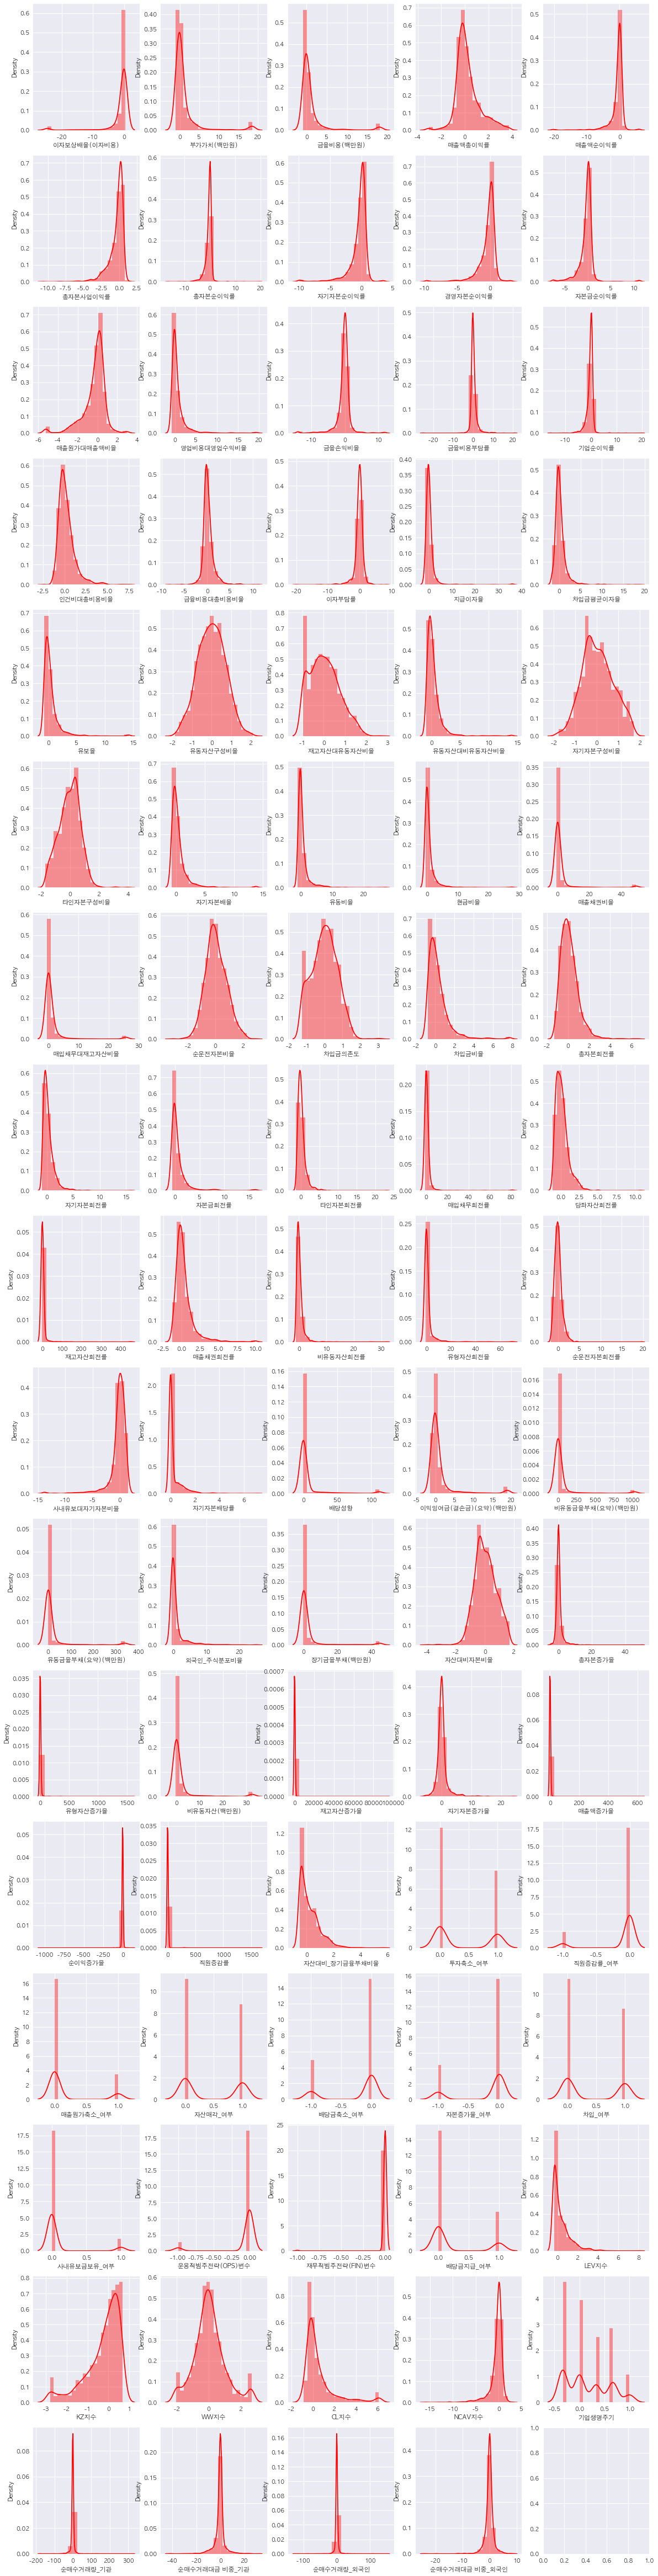

In [50]:
# distplot
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 17

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(x_scaled_robust.columns[:]):
    sns.distplot(x_scaled_robust[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

#### 5. QQplot

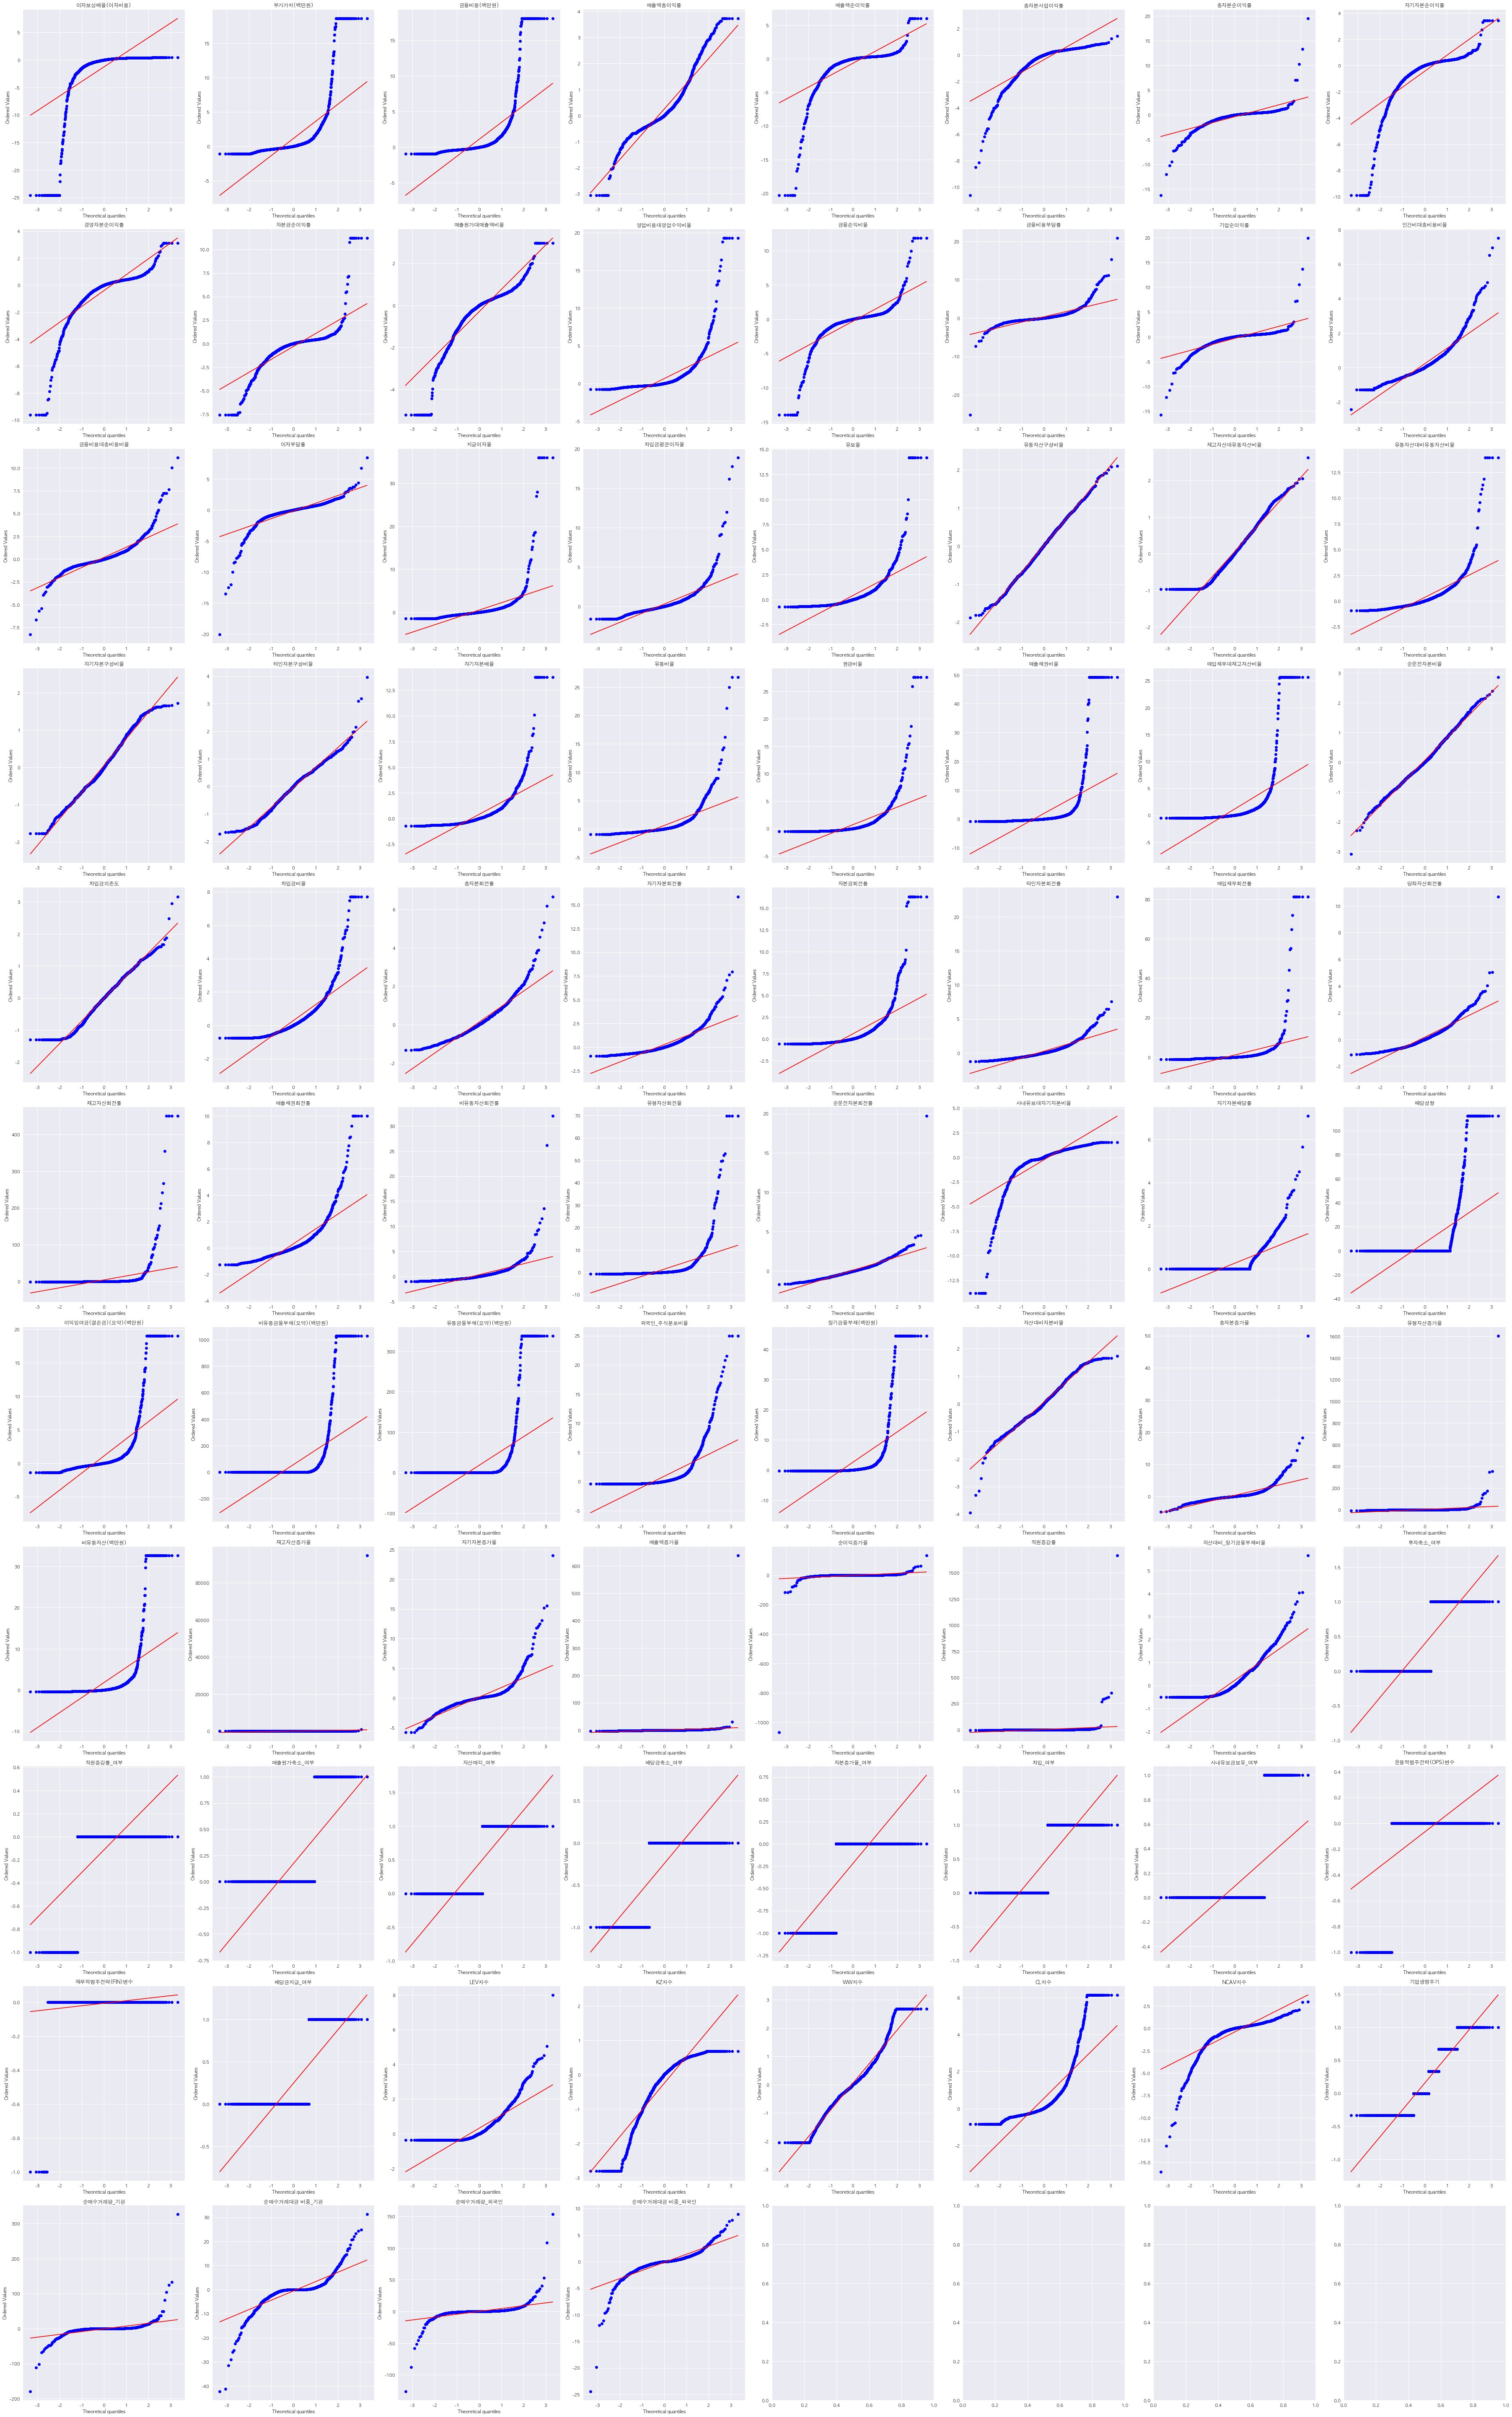

In [51]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"
# 85
ncols = 8
nrows = 11

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 80))

for ax, i in zip(axs.ravel(), x_scaled_robust):
        stats.probplot(x_scaled_robust[i], dist=stats.norm, plot=ax)
        ax.set_title(str(i))

plt.show()

#### 6. 샤피로 테스트

In [52]:
from scipy import stats
from scipy.stats import shapiro

def Shapiro(x_scaled_robust):
    Shapi = []
    Shapi.append([col for col in x_scaled_robust])
    for i in Shapi:
        for j in i:
            shapiro_test,p_val = shapiro(x_scaled_robust[j])
            print(j,"Test-statistics : {}, p-value : {}". format(shapiro_test,p_val))

Shapiro(x_scaled_robust.iloc[:,:])

이자보상배율(이자비용) Test-statistics : 0.38219577074050903, p-value : 0.0
부가가치(백만원) Test-statistics : 0.4647195339202881, p-value : 0.0
금융비용(백만원) Test-statistics : 0.4535812735557556, p-value : 0.0
매출액총이익률 Test-statistics : 0.9154991507530212, p-value : 1.9606208778811325e-28
매출액순이익률 Test-statistics : 0.5387294292449951, p-value : 0.0
총자본사업이익률 Test-statistics : 0.7528570890426636, p-value : 5.016648502282845e-43
총자본순이익률 Test-statistics : 0.6573109030723572, p-value : 0.0
자기자본순이익률 Test-statistics : 0.6735442876815796, p-value : 0.0
경영자본순이익률 Test-statistics : 0.7210065722465515, p-value : 7.006492321624085e-45
자본금순이익률 Test-statistics : 0.6975307464599609, p-value : 0.0
매출원가대매출액비율 Test-statistics : 0.8523654341697693, p-value : 1.2577017561658898e-35
영업비용대영업수익비율 Test-statistics : 0.4807264804840088, p-value : 0.0
금융손익비율 Test-statistics : 0.6676070690155029, p-value : 0.0
금융비용부담률 Test-statistics : 0.6303245425224304, p-value : 0.0
기업순이익률 Test-statistics : 0.6596087217330933, p-value : 0.0
인건비대총비용비

#### 7. 앤더슨

In [53]:
# 엔달슨 - 달링
from scipy import stats
from scipy.stats import anderson

def Anderson(x_scaled_robust):
    ander = []
    ander.append([col for col in x_scaled_robust])
    for i in ander:
        for j in i:
            anderson_test = anderson(x_scaled_robust[j], dist='norm')
            print(j,anderson_test)

Anderson(x_scaled_robust)

이자보상배율(이자비용) AndersonResult(statistic=338.05286655230884, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
부가가치(백만원) AndersonResult(statistic=284.70819048441876, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
금융비용(백만원) AndersonResult(statistic=292.7824277021805, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
매출액총이익률 AndersonResult(statistic=47.232069398248996, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
매출액순이익률 AndersonResult(statistic=210.17523132519182, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
총자본사업이익률 AndersonResult(statistic=97.12049960730701, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array

#### 8. 산점도(pair plot)

In [ ]:
# cmap = sns.light_palette("darkgray", as_cmap = True)
# sns.set(font="AppleGothic",rc = {'figure.figsize':(16,8)})  
# # sns.heatmap(x.corr(), annot = True, cmap = cmap)
# # plt.show()

# # 4) 변수끼리 산점도를 시각화
# sns.pairplot(x_scaled_robust)
# plt.show()

---
# Feature Selection

## 1. Heatmap

<AxesSubplot: title={'center': 'Correlation of Features'}>

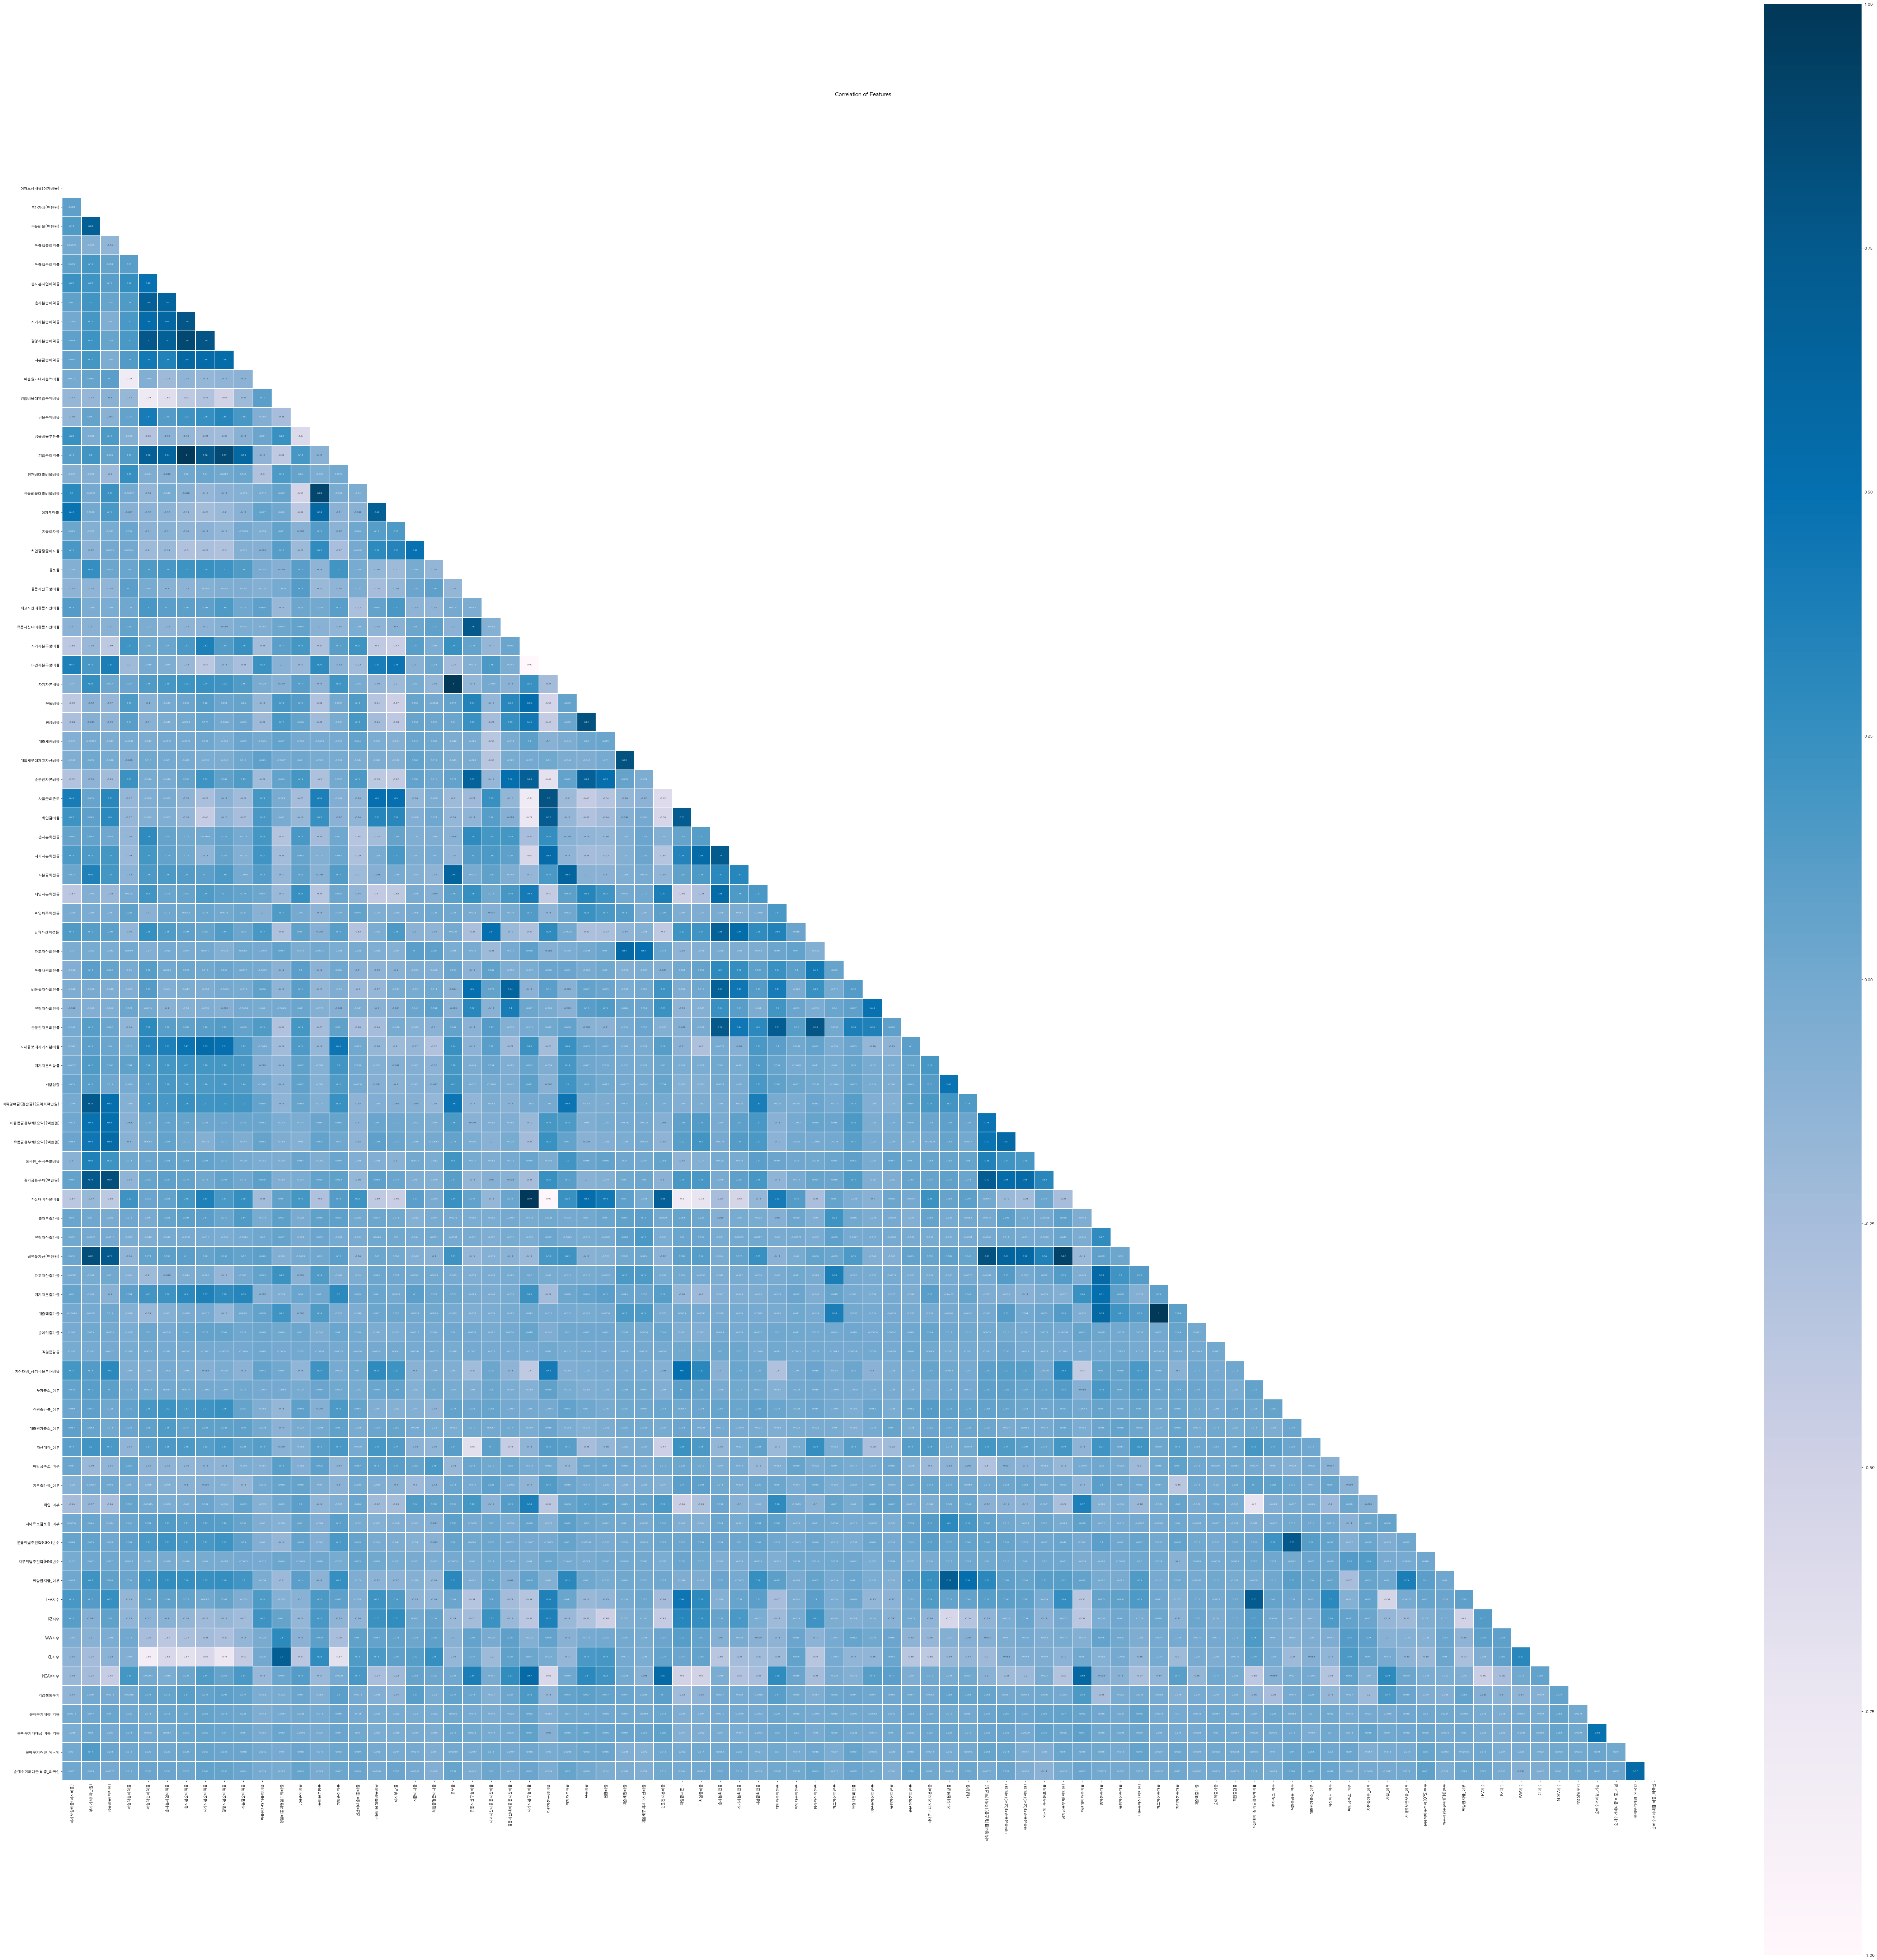

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = x_scaled_robust.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


colormap = plt.cm.PuBu
plt.figure(figsize=(100, 100))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(x_scaled_robust.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
            vmin= -1.0 , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 6})

#### 정규성검정 만족하는 컬럼 확인

In [9]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [10]:
# 1) shapiro
## normal
## 귀무가설을 기각하지 못했다 -> 정규분포를 따른다
## notnormal
## 귀무가설을 기각 대립가설 채택 -> data 분포가 정규분포를 따르지 않는다.
normal_s,notnormal_s = normal_test('shapiro',x_scaled_robust)
normal_s

normal
0  유동자산구성비율

In [11]:
# 2) anderson test
normal_a,notnormal_a = normal_test('anderson',x_scaled_robust)
normal_a

normal
0  유동자산구성비율

In [12]:
# 3) ks test
normal_ks,notnormal_ks = normal_test('kstest',x_scaled_robust)
normal_ks

Empty DataFrame
Columns: [normal]
Index: []

In [13]:
# 4) jarque_bera test
normal_jb,notnormal_jb = normal_test('jarque_bera',x_scaled_robust)
normal_jb

normal
0  유동자산구성비율

In [14]:
# 5) normaltest
normal_n,notnormal_n = normal_test('normaltest',x_scaled_robust)
normal_n

Empty DataFrame
Columns: [normal]
Index: []

---
# 등분산성 검정

In [19]:
x_등분산 = pd.concat([x_scaled_robust, y], axis=1)
x_등분산

이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률    매출액순이익률  총자본사업이익률  \
0        -0.720372  -1.108046  -0.146535 -0.322164  -0.284574 -0.570441   
1        -0.382649  -0.124097  -0.184641 -0.216416  -0.156080 -0.233362   
2         0.337723   2.279435   5.757975  0.658469   0.153902  0.342264   
3         0.303641   6.183145  -0.909159  0.117430   0.243920  0.388937   
4         0.340821  18.592589  18.069790  0.287120  -0.325227  0.420052   
...            ...        ...        ...       ...        ...       ...   
1530      0.035631  -0.210932   0.185469  0.012296  -0.074047 -0.570441   
1531     -0.701782  -0.226852  -0.173744  1.157086 -16.342650 -1.756266   
1532      0.311387  -0.480962  -0.208239  1.967415  -4.977132  0.395851   
1533     -1.900852  -0.455864  -0.349567  3.604673  -0.485662 -0.891962   
1534      0.227730   0.821728   0.095418  2.783277   0.364428  0.364736   

       총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...      KZ지수      WW지수  \
0    -0.346241 -0.173657 -0.231499  0.266294  ... -0.030929  0.326211   
1    -0.241458 -0.138828 -0.144213  0.284077  ...  0.102386 -0.268011   
2     0.329157  0.303655  0.220114 -0.308088  ...  0.459110  0.324068   
3     0.284738  0.237920  0.266603 -0.340675  ... -0.762392  0.004527   
4    -0.219818 -0.336522 -0.185958 -2.241199  ... -0.556283  0.076953   
...        ...       ...       ...       ...  ...       ...       ...   
1530 -0.317768 -0.089772 -0.479127  0.064994  ... -1.138403 -0.018242   
1531 -7.225513 -9.688496 -7.483871 -1.899260  ... -0.504544  1.035940   
1532 -1.656036 -1.447143 -1.485769 -1.373984  ... -1.138381 -0.108052   
1533 -0.378132  0.000000 -0.318786 -0.454234  ...  0.399899  0.727491   
1534  0.449886  0.399804  0.440228  0.484022  ...  0.219144 -2.042881   

          CL지수    NCAV지수    기업생명주기  순매수거래량_기관  순매수거래대금 비중_기관  순매수거래량_외국인  \
0     0.150306  0.166822 -0.333333  -0.084346      -0.016488   -1.489969   
1     0.023704  0.104852  0.000000   0.001532       0.013681    3.695958   
2    -0.044133 -3.676377  0.000000   0.118199       0.960958    0.004778   
3    -0.267910  0.221905  1.000000   0.885477       2.286981   -0.505276   
4    -0.131836 -0.904440 -0.333333  -3.690097      -1.423009   -3.471824   
...        ...       ...       ...        ...            ...         ...   
1530  0.305808  0.350171 -0.333333 -48.126571      -6.723115   -2.793520   
1531  6.143555 -0.564117 -0.333333  -0.133315      -0.207047    1.586047   
1532  4.847739  0.593504  0.000000  -0.062935      -0.302835    0.060033   
1533  0.452226  0.321708 -0.333333  -0.735573      -1.176306    0.902793   
1534 -0.308615  0.444216  0.333333   1.872468       2.484217   -2.889820   

      순매수거래대금 비중_외국인  회생여부  
0          -0.090846     0  
1           0.800981     0  
2           0.054619     1  
3          -1.072677     1  
4          -2.932966     1  
...              ...   ...  
1530       -0.502816     0  
1531        0.604939     0  
1532        0.125258     0  
1533        0.475043     0  
1534        0.135935     1  

[1535 rows x 85 columns]

In [21]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산성
from scipy.stats import bartlett
def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(x_등분산[x_등분산['회생여부']==1][i], x_등분산[x_등분산['회생여부']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [22]:
# 이분산성 변수
x_hetero = bartlett_test(x_scaled_robust.columns, H = 1)
x_hetero

변수        p_value
60          순이익증가율   0.000000e+00
57         재고자산증가율   0.000000e+00
59          매출액증가율   0.000000e+00
55         유형자산증가율  2.608806e-246
61           직원증감률  2.867387e-143
..             ...            ...
83  순매수거래대금 비중_외국인   3.360934e-02
23    유동자산대비유동자산비율   3.694978e-02
62   자산대비_장기금융부채비율   4.232315e-02
67        배당금축소_여부   4.925147e-02
18           지급이자율   4.944639e-02

[64 rows x 2 columns]

In [23]:
# 등분산성 변수
x_homo = bartlett_test(x_scaled_robust.columns, H = 0)
x_homo

변수   p_value
20               유보율  0.057002
70        사내유보금보유_여부  0.064689
26            자기자본배율  0.077415
79            기업생명주기  0.136772
74             LEV지수  0.142053
24          자기자본구성비율  0.170322
68          자본증가율_여부  0.193271
2          금융비용(백만원)  0.228703
31           순운전자본비율  0.401884
22       재고자산대유동자산비율  0.439707
25          타인자본구성비율  0.458612
53          자산대비자본비율  0.545595
72    재무적범주전략(FIN)변수  0.580399
32            차입금의존도  0.632598
21          유동자산구성비율  0.638300
9            자본금순이익률  0.694128
69             차입_여부  0.702766
49  비유동금융부채(요약)(백만원)  0.707783
66           자산매각_여부  0.825705
63           투자축소_여부  0.842378

## 2. t-test

In [26]:
# 2) t_test
import scipy.stats as stats
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['회생여부']==1][i], x_등분산[x_등분산['회생여부']==0][i], equal_var=True)
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['회생여부']==1][i], x_등분산[x_등분산['회생여부']==0][i], equal_var=False)
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [29]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(x_scaled_robust.columns, x_homo, x_hetero, p_value=0.05)
print("유의한 피쳐 수 :", len(x_ttest))
x_ttest

유의한 피쳐 수 : 42


변수       p_value
5              총자본사업이익률  3.286468e-12
11          영업비용대영업수익비율  3.489278e-10
77                 CL지수  9.869471e-10
76                 WW지수  9.521502e-09
8              경영자본순이익률  1.053139e-08
7              자기자본순이익률  9.472215e-08
6               총자본순이익률  2.037998e-07
4               매출액순이익률  4.043816e-07
14               기업순이익률  1.200903e-06
32               차입금의존도  1.950424e-06
37              타인자본회전률  3.915321e-06
44             순운전자본회전률  4.368306e-05
34               총자본회전률  9.749278e-05
48  이익잉여금(결손금)(요약)(백만원)  2.440336e-04
19             차입금평균이자율  2.721845e-04
16           금융비용대총비용비율  2.864454e-04
13              금융비용부담률  2.924010e-04
45          사내유보대자기자본비율  3.007378e-04
1             부가가치(백만원)  3.905958e-04
46              자기자본배당률  1.042380e-03
36               자본금회전률  1.684399e-03
73             배당금지급_여부  1.807986e-03
17                이자부담률  1.924443e-03
31              순운전자본비율  2.059590e-03
75                 KZ지수  3.304768e-03
64             직원증감률_여부  3.560133e-03
33                차입금비율  7.925309e-03
79               기업생명주기  1.055800e-02
83       순매수거래대금 비중_외국인  1.494488e-02
67             배당금축소_여부  1.666700e-02
42             비유동자산회전률  1.779922e-02
39              당좌자산회전률  1.782151e-02
56           비유동자산(백만원)  2.106071e-02
54               총자본증가율  2.521909e-02
21             유동자산구성비율  2.637575e-02
53             자산대비자본비율  2.832006e-02
26               자기자본배율  3.143750e-02
20                  유보율  3.157588e-02
25             타인자본구성비율  3.895752e-02
69                차입_여부  4.029505e-02
24             자기자본구성비율  4.640008e-02
9               자본금순이익률  4.884230e-02

In [28]:
len(x_ttest)

42

## 3. VIF

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(x_scaled_robust.values, i) for i in range(x_scaled_robust.shape[1])]
vif["features"] = x_scaled_robust.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

VIF Factor        features
0   1199.431806         총자본순이익률
1   1153.715584          기업순이익률
2    533.549457          자기자본배율
3    528.565146             유보율
4    248.416668        타인자본구성비율
..          ...             ...
79     1.295658       매출원가축소_여부
80     1.163062         유형자산증가율
81     1.093644  재무적범주전략(FIN)변수
82     1.040636          순이익증가율
83     1.023948           직원증감률

[84 rows x 2 columns]

In [34]:
col_유의 = list(x_ttest["변수"])
x_유의 = x_scaled_robust[col_유의]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(x_유의.values, i) for i in range(x_유의.shape[1])]
vif["features"] = x_유의.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

VIF Factor             features
0   956.187112              총자본순이익률
1   911.201875               기업순이익률
2   506.929327               자기자본배율
3   501.382767                  유보율
4   193.114789             타인자본구성비율
5   144.902908             자기자본구성비율
6    81.399039             자산대비자본비율
7    15.048642              매출액순이익률
8    12.862045             순운전자본회전률
9    11.321635           금융비용대총비용비율
10   10.894519              순운전자본비율
11   10.843774             경영자본순이익률
12    9.601862          영업비용대영업수익비율
13    9.420427               총자본회전률
14    9.207785             유동자산구성비율
15    7.964043              타인자본회전률
16    7.173803              금융비용부담률
17    6.597681           비유동자산(백만원)
18    6.433272             총자본사업이익률
19    6.269433                 CL지수
20    5.987303               차입금의존도
21    5.400963             자기자본순이익률
22    5.308218  이익잉여금(결손금)(요약)(백만원)
23    4.673371            부가가치(백만원)
24    4.623855                이자부담률
25    4.390263              당좌자산회전률
26    4.152551                차입금비율
27    3.271957             배당금지급_여부
28    3.178810               자본금회전률
29    2.916296              자기자본배당률
30    2.708629             비유동자산회전률
31    2.474685                 KZ지수
32    2.414924                차입_여부
33    2.035350              자본금순이익률
34    2.014430          사내유보대자기자본비율
35    1.784382             차입금평균이자율
36    1.515145             배당금축소_여부
37    1.389380               총자본증가율
38    1.327584               기업생명주기
39    1.295477                 WW지수
40    1.248020             직원증감률_여부
41    1.069395       순매수거래대금 비중_외국인

Heatmap

<AxesSubplot: title={'center': 'Correlation of Features'}>

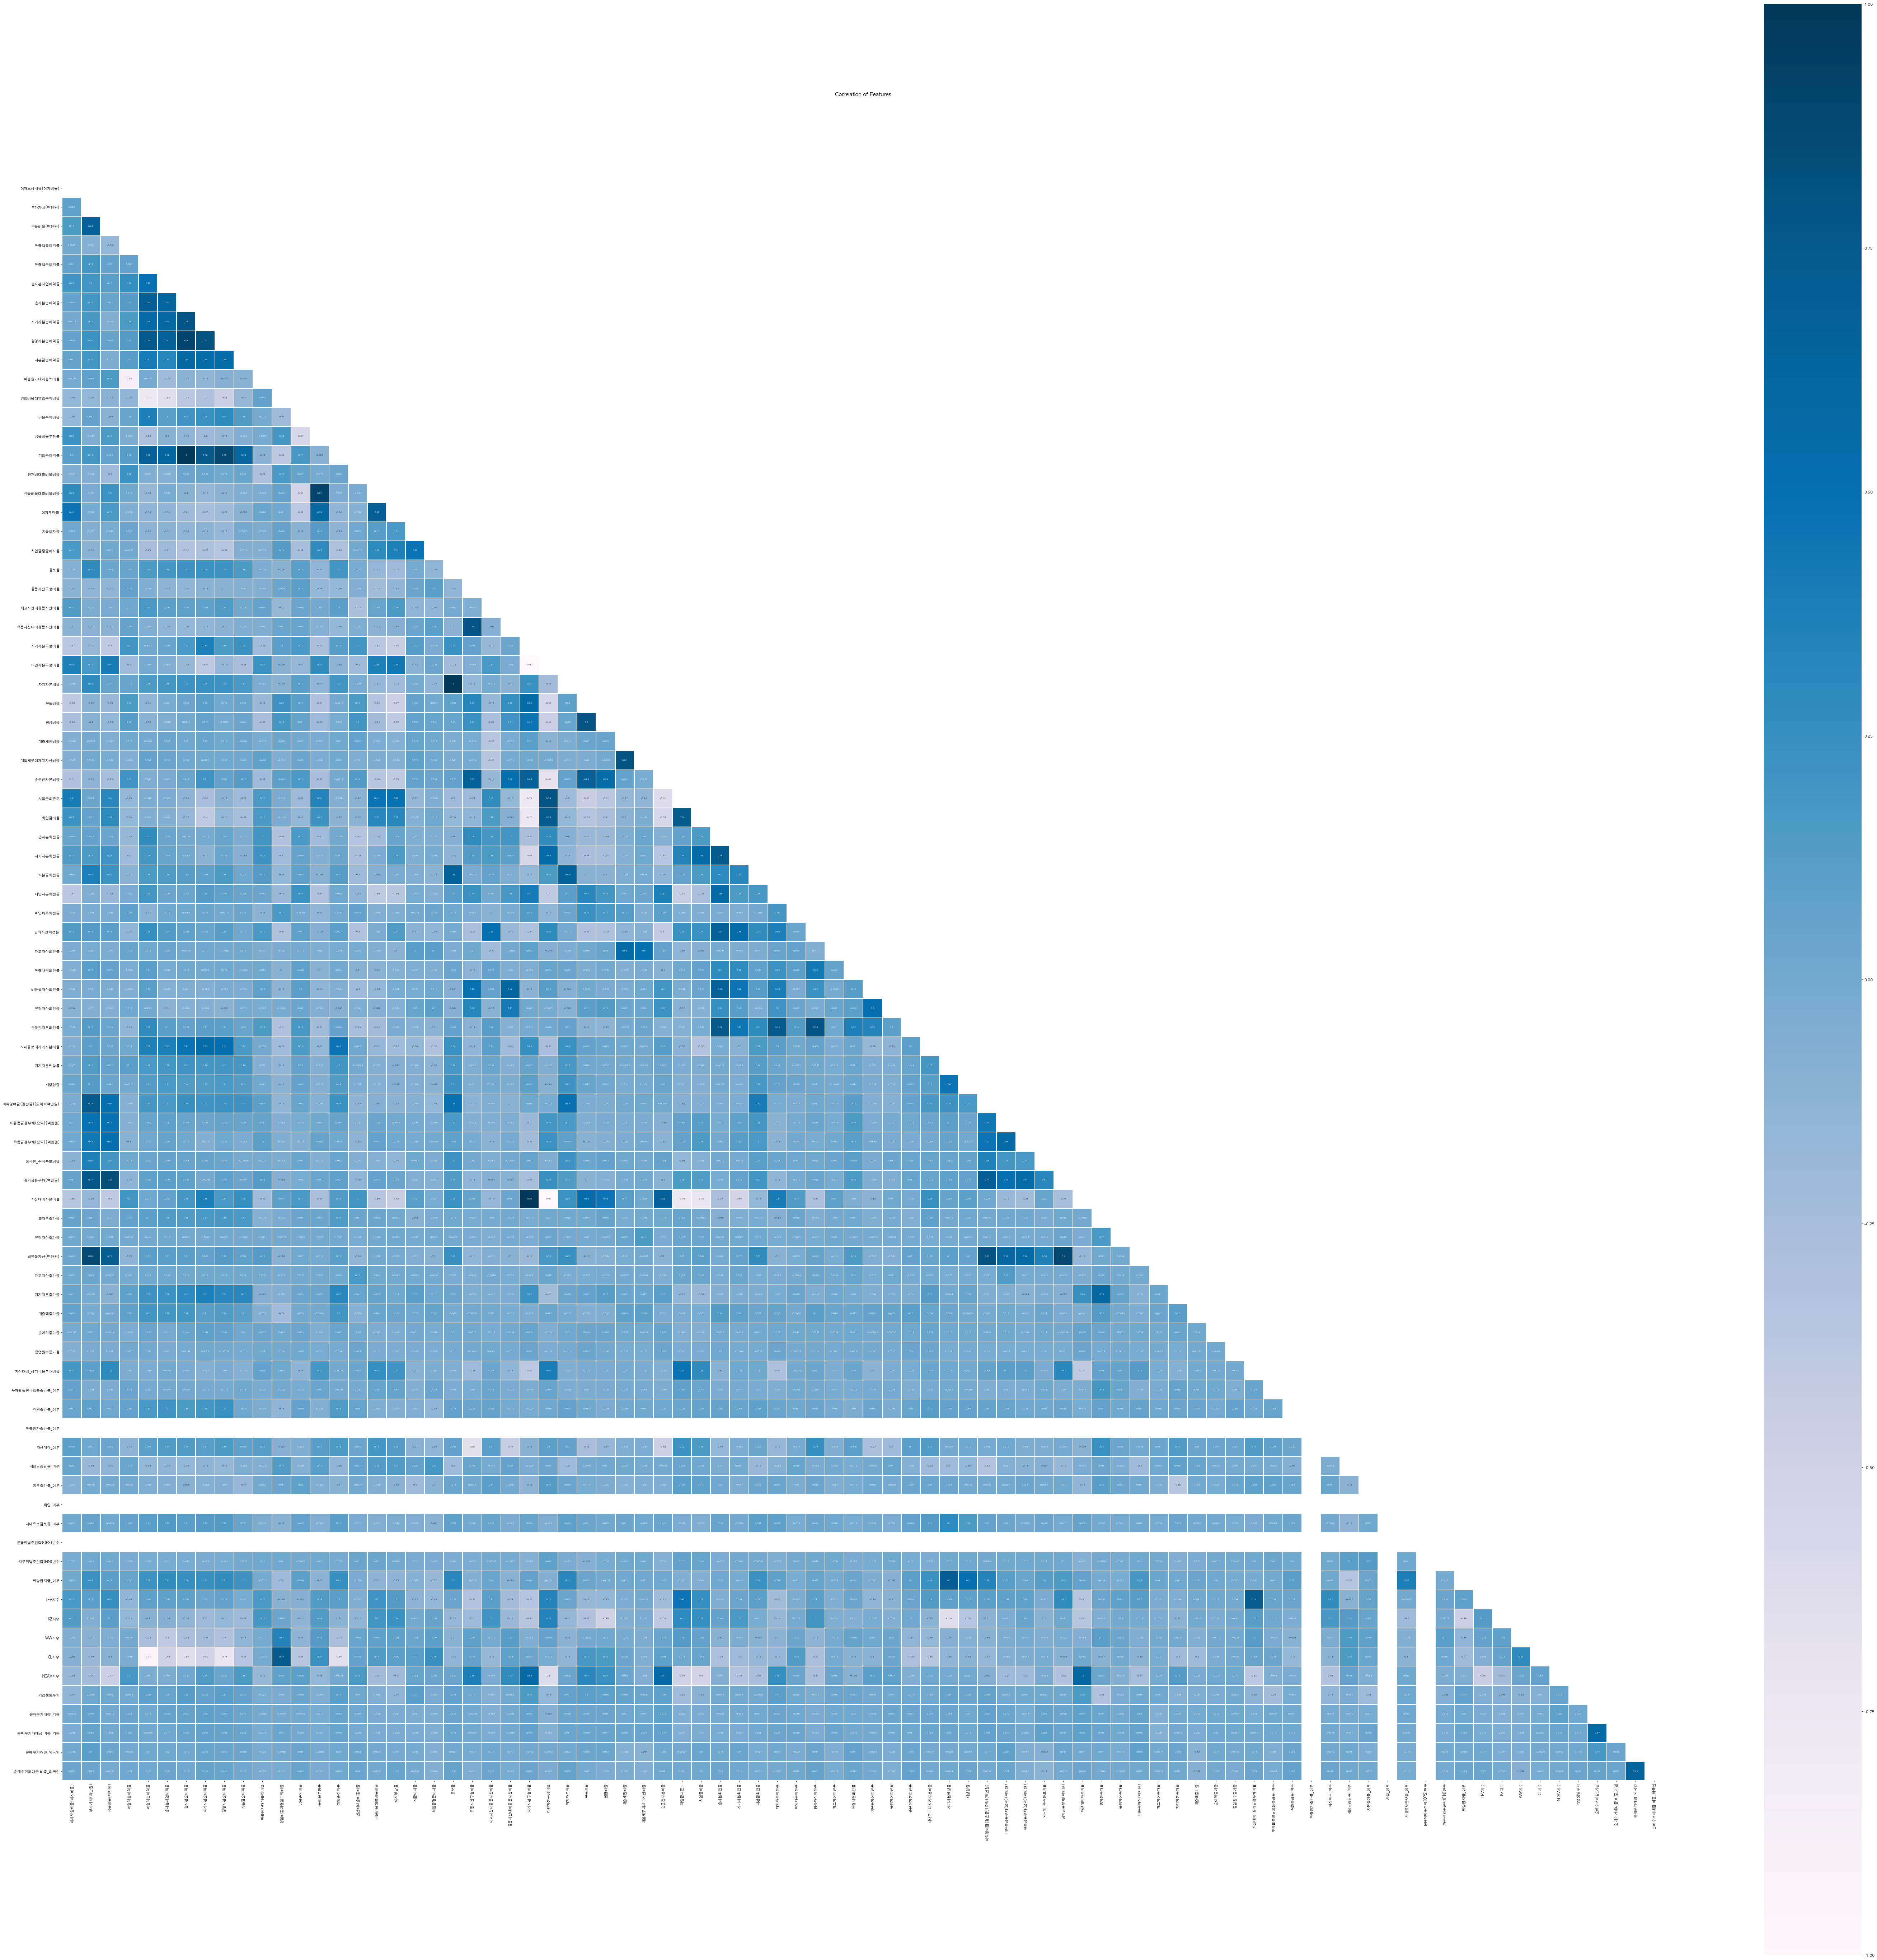

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# plt.rcParams['font.family'] = 'Malgun Gothic'
x = df_부실징후.drop(['회사명',"거래소코드","회계년도","회생여부"], axis= 1)
df_corr = x.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


colormap = plt.cm.PuBu
plt.figure(figsize=(100, 100))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(x.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
            vmin= -1.0 , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 6})

In [7]:
df_부실징후["매출원가증감률_여부"].describe()

count    1301.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: 매출원가증감률_여부, dtype: float64

In [10]:
df_부실징후["차입_여부"].describe()

count    1301.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: 차입_여부, dtype: float64

VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif